Dataset Shape: (70000, 784)
Best KNN Parameters: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best Cross-Validation Accuracy: 0.9454642857142858

KNN Test Accuracy: 0.9469285714285715
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1381
           1       0.96      0.99      0.97      1575
           2       0.96      0.93      0.95      1398
           3       0.94      0.95      0.95      1428
           4       0.96      0.92      0.94      1365
           5       0.94      0.92      0.93      1263
           6       0.96      0.98      0.97      1375
           7       0.93      0.94      0.93      1459
           8       0.97      0.91      0.94      1365
           9       0.90      0.92      0.91      1391

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

SGD Classifier Test Accuracy: 0.9025
Random Forest

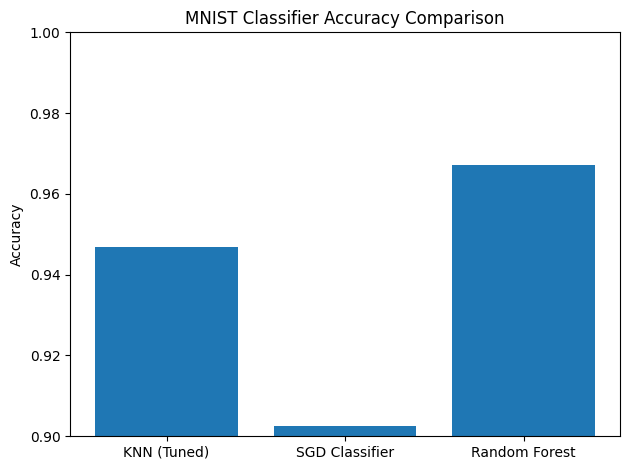

In [2]:
# MNIST Classification with KNN and Model Comparison
# ----------------------------------------------------------
# Goal: Achieve ≥97% accuracy using KNN with Grid Search
# Compare KNN performance with SGD and Random Forest classifiers

# ----------------------------------------------------------
# 1. Import Required Libraries
# ----------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------------------------------------
# 2. Load MNIST Dataset
# ----------------------------------------------------------
# NOTE: Requires internet access
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist.data, mnist.target.astype(np.int64)

print("Dataset Shape:", X.shape)

# ----------------------------------------------------------
# 3. Train-Test Split
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. KNN Pipeline (Scaling + Classifier)
# ----------------------------------------------------------
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# ----------------------------------------------------------
# 5. Grid Search for KNN Hyperparameter Tuning
# ----------------------------------------------------------
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best KNN Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# ----------------------------------------------------------
# 6. Evaluate Best KNN Model on Test Set
# ----------------------------------------------------------
best_knn = grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("\nKNN Test Accuracy:", knn_accuracy)
print(classification_report(y_test, y_pred_knn))

# ----------------------------------------------------------
# 7. SGD Classifier
# ----------------------------------------------------------
sgd_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=42))
])

sgd_pipeline.fit(X_train, y_train)
y_pred_sgd = sgd_pipeline.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)

print("SGD Classifier Test Accuracy:", sgd_accuracy)

# ----------------------------------------------------------
# 8. Random Forest Classifier (Lab 4 Comparison)
# ----------------------------------------------------------
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Test Accuracy:", rf_accuracy)

# ----------------------------------------------------------
# 9. Model Accuracy Comparison
# ----------------------------------------------------------
results_df = pd.DataFrame({
    'Model': ['KNN (Tuned)', 'SGD Classifier', 'Random Forest'],
    'Accuracy': [knn_accuracy, sgd_accuracy, rf_accuracy]
})

print("\nModel Comparison:\n")
print(results_df)

plt.figure()
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('MNIST Classifier Accuracy Comparison')
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# End
# ----------------------------------------------------------
